In [1]:

import ipympl

from lsst.pipe.tasks.sourceClassification import SourceClassificationTask
import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import glob
import sncosmo
import pickle
from astropy.table import Table
import re
import astropy.coordinates as coord
import astropy.units as u

import numpy as np
import glob

import Utils.DiaSourceTools as DSTools
import Utils.SourcePlotting as SP
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import clear_output

In [2]:
season_catalogs = []
visit_refs = []
in_directory = "season_catalogs/6sigma/"
c_files = glob.glob(in_directory+"*.fits")
for c_f in c_files:
    catalog = afwTable.SourceCatalog.readFits(c_f)
    visit =  c_f.split("/")[-1].split("-")[0]
    fil  = c_f.split("/")[-1].split("-")[-1].split(".")[0]
    if fil == "r":
        season_catalogs.append(catalog)
        visit_refs.append(visit)
        
        

In [3]:
def multi_match_catalogs(catalog_list, data_refs):
    multi_matches = None

    for catalog, data_ref in zip(catalog_list, data_refs):

            if multi_matches is None and len(catalog)>0:
                multi_matches = afwTable.MultiMatch(catalog[0].schema, {'visit':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))
            if multi_matches is not None:
                multi_matches.add(catalog, {'visit':int(data_ref)})

    results = multi_matches.finish(removeAmbiguous=False)  
    return results



In [4]:
results = multi_match_catalogs(season_catalogs, visit_refs)
print len(results)

188202


In [10]:
light_curves=DSTools.get_light_curves_from_multimatch_results2(results)
print len(light_curves)

57598


In [11]:
t_light_curves = DSTools.threshold_light_curves(light_curves, 1)
print len(t_light_curves)

57598


In [12]:
light_curves[0]

[<lsst.afw.table.tableLib.SourceRecord; proxy of <Swig Object of type 'boost::shared_ptr< lsst::afw::table::SourceRecord > *' at 0x7f9814164720> >,
 <lsst.afw.table.tableLib.SourceRecord; proxy of <Swig Object of type 'boost::shared_ptr< lsst::afw::table::SourceRecord > *' at 0x7f98141b0db0> >,
 <lsst.afw.table.tableLib.SourceRecord; proxy of <Swig Object of type 'boost::shared_ptr< lsst::afw::table::SourceRecord > *' at 0x7f98141b0d80> >,
 <lsst.afw.table.tableLib.SourceRecord; proxy of <Swig Object of type 'boost::shared_ptr< lsst::afw::table::SourceRecord > *' at 0x7f9814164690> >,
 <lsst.afw.table.tableLib.SourceRecord; proxy of <Swig Object of type 'boost::shared_ptr< lsst::afw::table::SourceRecord > *' at 0x7f98141647e0> >,
 <lsst.afw.table.tableLib.SourceRecord; proxy of <Swig Object of type 'boost::shared_ptr< lsst::afw::table::SourceRecord > *' at 0x7f9814164840> >,
 <lsst.afw.table.tableLib.SourceRecord; proxy of <Swig Object of type 'boost::shared_ptr< lsst::afw::table::Sour

In [14]:
lcs2 = []
for t_light_curve in t_light_curves:
    lcs2.append(DSTools.build_lightcurve(t_light_curve, "base_CircularApertureFlux_4_5_flux"))

In [20]:
len(lcs1)

0

In [11]:
import re
import astropy.coordinates as coord
import astropy.units as u

filter='r'

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
elems = re.findall('^(06D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()

snls_array = []
for sn in elems:
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    m = re.findall('^'+str(sn[0])+'\\|('+filter+')\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    snls_lc = DSTools.build_light_curve_from_snls_file(m, c)
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
    snls_array.append(snls_lc)
    plt.show()

In [ ]:
matches = DSTools.match_control_group(lcs,snls_array)
float(len(matches))/float(len(snls_array))

In [22]:
import lsst.daf.persistence as dafPersist

DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/"
butler = dafPersist.Butler(DATADIR+"/output") 

In [ ]:
path = "/renoir_data_02/jpreyes/stamp_data/filter_r/"
for i, lc in enumerate(lcs2):
    stamps = get_stamps_in_lc(lc)
    for j, (point, (stamp, c_stamp)) in enumerate(zip(lc, stamps)):
         
        name = str(i)+"-"+str(j)+"-"+str(point["mjd"])+"-"+str(int(point["classification"]))
        if stamp is not None:
            stamp.writeFits(path+name+".fits")
            
    

        


  File "src/image/Image.cc", line 92, in static lsst::afw::image::ImageBase<PixelT>::_view_t lsst::afw::image::ImageBase<PixelT>::_makeSubView(const Extent2I&, const Extent2I&, const _view_t&) [with PixelT = float; lsst::afw::image::ImageBase<PixelT>::_view_t = boost::gil::image_view<boost::gil::memory_based_2d_locator<boost::gil::memory_based_step_iterator<boost::gil::pixel<float, boost::gil::layout<boost::mpl::vector1<boost::gil::gray_color_t> > >*> > >; lsst::afw::geom::Extent2I = lsst::afw::geom::Extent<int, 2>]
    Box2I(Point2I(-3,688),Extent2I(31,31)) doesn't fit in image 2048x4612 {0}
lsst::pex::exceptions::LengthError: 'Box2I(Point2I(-3,688),Extent2I(31,31)) doesn't fit in image 2048x4612'


  File "src/image/Image.cc", line 92, in static lsst::afw::image::ImageBase<PixelT>::_view_t lsst::afw::image::ImageBase<PixelT>::_makeSubView(const Extent2I&, const Extent2I&, const _view_t&) [with PixelT = float; lsst::afw::image::ImageBase<PixelT>::_view_t = boost::gil::image_view<boos

In [57]:
stamps = get_stamps_in_lc(lcs2[10])



(31, 31)


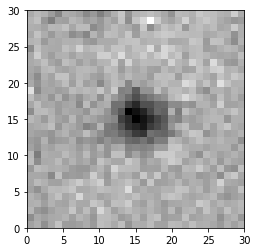

In [58]:
%matplotlib inline
stamp, c_stamp = stamps[2]

img_arr, mask_arr, var_arr = stamp.getMaskedImage().getArrays()
w,h = stamp.getWidth(), stamp.getHeight()  
plt.imshow(img_arr, origin='lower', vmin=img_arr.min(), vmax=img_arr.max(), cmap='gray', extent=(0,w-1, 0, h-1), interpolation='none')
print img_arr.shape

In [56]:
def get_stamps_in_lc(lc):
    ccds= range(0,36)
    stamps = []
    CenterRa = np.mean(lc["ra"])
    CenterDec = np.mean(lc["dec"])
    for point in lc:

        for ccd in ccds: 
            if butler.datasetExists("deepDiff_differenceExp",dataId={"filter":'r', 'visit':point["mjd"], 'ccd':ccd}):
                diffExp = butler.get("deepDiff_differenceExp", dataId={"filter":'r', 'visit':point["mjd"], 'ccd':ccd})
                box = diffExp.getBBox()
                wcs = diffExp.getWcs()
                coord = afwGeom.Point2I(wcs.skyToPixel(CenterRa, CenterDec))
                if box.contains(coord):
                    break


        #calexp = butler.get("calexp", dataId={"filter":'r', 'visit':point["mjd"], 'ccd':ccd})
        calexp = butler.get("calexp", dataId={"filter":'r', 'visit':point["mjd"], 'ccd':ccd})



        Center = afwGeom.Point2I(wcs.skyToPixel(CenterRa, CenterDec))
        Begin = afwGeom.Point2I(Center.getX() - 15, Center.getY() - 15)
        End = afwGeom.Point2I(Center.getX() + 15, Center.getY() + 15)

        newBox = afwGeom.Box2I(Begin,End) 
        try:
            cal_stamp = calexp.Factory(calexp, newBox, True)
            stamp = diffExp.Factory(diffExp,newBox, True)
            stamps.append((stamp, cal_stamp))
        except Exception, e:
            print e
            stamps.append((None, None))
            pass
        
    return stamps
    

In [ ]:
lc = lcs2[45]
print len(lc)

In [ ]:

stamps = get_stamps_in_lc(lc)

In [ ]:
plt.close("all")
fig = plt.figure(figsize=(10,5))
fig2 = plt.figure(figsize=(10,10))
plt.figure(fig.number)
#plt.ylim(ymin=-75000, ymax=100000)
tolerance = 5 # points
plt.errorbar(lc["mjd"],lc["flux"], yerr=lc["flux_error"],fmt='.', color='blue', picker=tolerance)

fig.canvas.mpl_connect('pick_event', lambda event: on_pick(event, stamps , fig2.number))
plt.show()

In [ ]:
def on_pick(event, stamps, fig_number):
    
    clear_output()
    
    plt.figure(fig_number)
    plt.clf()
    artist = event.artist
    
    xmouse, ymouse = event.mouseevent.xdata, event.mouseevent.ydata
    x, y = artist.get_xdata(), artist.get_ydata()
    ind = event.ind

    stamp, c_stamp = stamps[ind[0]]


    plt.subplot(2,2,1)
    img_arr, mask_arr, var_arr = stamp.getMaskedImage().getArrays()
    w,h = stamp.getWidth(), stamp.getHeight()  
    plt.imshow(img_arr, origin='lower', vmin=img_arr.min(), vmax=img_arr.max(), cmap='gray', extent=(0,w-1, 0, h-1), interpolation='none')
    plt.subplot(2,2,3)
    plt.hist(img_arr.flat, 100)
    
    plt.subplot(2,2,2)
    img_arr, mask_arr, var_arr = c_stamp.getMaskedImage().getArrays()
    w,h = c_stamp.getWidth(), c_stamp.getHeight()
    plt.imshow(img_arr, origin='lower', vmin=img_arr.min(), vmax=img_arr.max(), cmap='gray', extent=(0,w-1, 0, h-1), interpolation='none')
    plt.subplot(2,2,4) 
    plt.hist(img_arr.flat, 100)
        
    plt.show()
    

In [109]:
stamp, c_stamp = stamps[0]
img_arr, mask_arr, var_arr = stamp.getMaskedImage().getArrays()

In [107]:
plt.hist(img_arr.flat, 100)
plt.show()

In [111]:
img_arr, mask_arr, var_arr = c_stamp.getMaskedImage().getArrays()
plt.hist(img_arr.flat, 100)
plt.show()